In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [2]:
df = pd.read_csv('medical_examination.csv')

df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [3]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.dtypes

id               int64
age              int64
sex              int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [5]:
df['bmi'] = df['weight'] / ( (df['height'] / 100) ** 2)

df['overweight'] = (df['bmi'] > 25).astype(int)

In [6]:
df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,1


To normalize the cholesterol and gluc columns by setting 0 as "good" and 1 as "bad", you can follow these steps:

Check the condition: For both columns, if the value is 1, you should set it to 0 (indicating good). If the value is greater than 1, you should set it to 1 (indicating bad).

Use a transformation: You can apply a transformation to these columns using conditional logic (apply, map, or simple vectorized operations).

Modify the columns: Update the cholesterol and gluc columns based on the conditions defined above.

In [7]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1 )
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1 )

df

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,50.472681,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


Draw the Categorical Plot in the draw_cat_plot function.

,cardio,variable,value,count
0,0,active,0,6378
1,0,active,1,28643
2,0,alco,0,33080
3,0,alco,1,1941
4,0,cholesterol,0,29330
5,0,cholesterol,1,5691
6,0,gluc,0,30894
7,0,gluc,1,4127
8,0,overweight,0,15915
9,0,overweight,1,19106


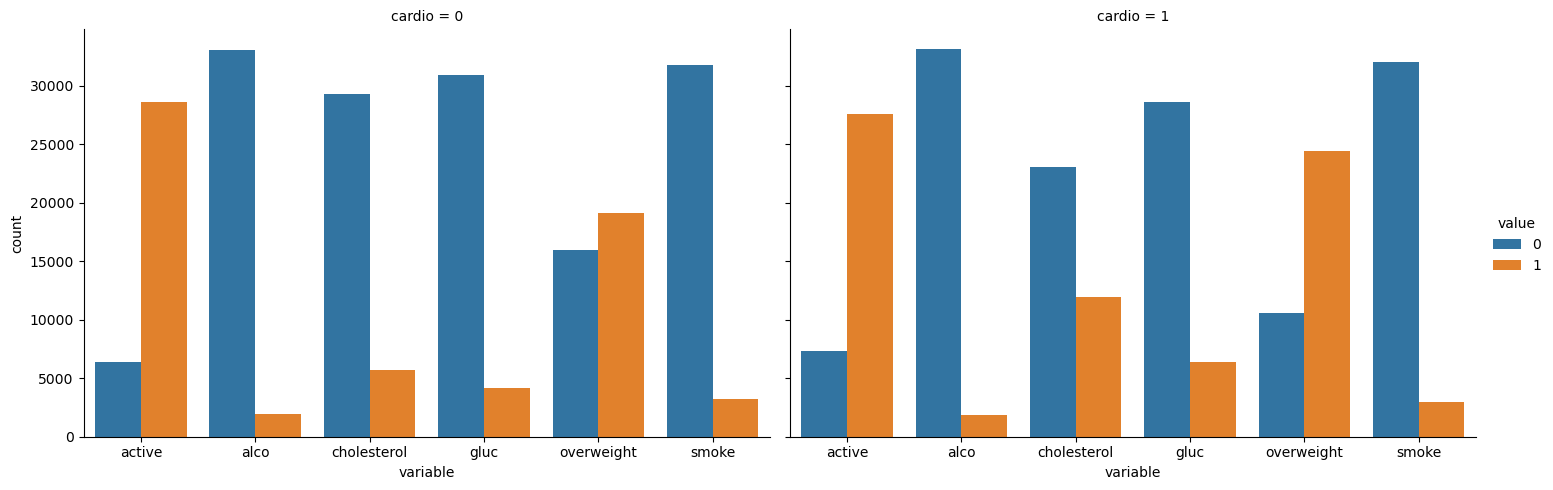

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

df_cat_grouped = df_cat.groupby(['cardio', 'variable', 'value']).size().reset_index(name='count')

catplot = sns.catplot(x='variable', y='count', hue='value', col='cardio', data=df_cat_grouped, kind='bar', height=5, aspect=1.5)

fig = catplot.fig

df_cat_grouped

Draw the Heat Map in the draw_heat_map function.
Clean the data in the df_heat variable by filtering out the following patient segments that represent incorrect data:
diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
height is more than the 97.5th percentile
weight is less than the 2.5th percentile
weight is more than the 97.5th percentile
Calculate the correlation matrix and store it in the corr variable.
Generate a mask for the upper triangle and store it in the mask variable.
Set up the matplotlib figure.
Plot the correlation matrix using the method provided by the seaborn library import: sns.heatmap().

In [56]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,0.251643,0.150300,0.088129,0.053771,0.803729,0.499700,27.556513,0.622086
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.433960,0.357368,0.283484,0.225568,0.397179,0.500003,6.091511,0.484870
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.471784,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,23.875115,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,26.374068,1.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,30.222222,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,298.666667,1.000000


In [61]:
df_heat = df[df['ap_lo'] <= df['ap_hi']]

df_heat = df[(df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))]
df_heat = df[(df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] <= df['weight'].quantile(0.975))]

df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,31.353579,1
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,27.099251,1


In [64]:
corr = df_heat.corr()

corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
id,1.000000,0.002715,0.003289,-0.002878,0.000026,0.003530,-0.002572,0.004211,0.001299,-0.003070,0.000792,0.004090,0.003436,0.002250,0.000853
age,0.002715,1.000000,-0.025403,-0.084936,0.061725,0.019770,0.018273,0.130670,0.088382,-0.046411,-0.029129,-0.010578,0.239567,0.098472,0.092014
sex,0.003289,-0.025403,1.000000,0.493673,0.153110,0.004899,0.013995,-0.038405,-0.021663,0.338138,0.169486,0.006579,0.000667,-0.127936,-0.059265
height,-0.002878,-0.084936,0.493673,1.000000,0.272695,0.003336,0.003271,-0.060165,-0.029454,0.186471,0.091294,-0.004929,-0.027095,-0.372723,-0.164584
weight,0.000026,0.061725,0.153110,0.272695,1.000000,0.027801,0.036906,0.132028,0.104237,0.064045,0.063248,-0.013925,0.167577,0.724519,0.635803
ap_hi,0.003530,0.019770,0.004899,0.003336,0.027801,1.000000,0.014966,0.023948,0.011738,-0.001440,0.000932,0.000117,0.052578,0.022330,0.018641
ap_lo,-0.002572,0.018273,0.013995,0.003271,0.036906,0.014966,1.000000,0.025256,0.012540,0.003759,0.011017,0.004231,0.062623,0.029845,0.026599
cholesterol,0.004211,0.130670,-0.038405,-0.060165,0.132028,0.023948,0.025256,1.000000,0.382798,0.013996,0.040894,0.005065,0.204551,0.142452,0.130297
gluc,0.001299,0.088382,-0.021663,-0.029454,0.104237,0.011738,0.012540,0.382798,1.000000,-0.003267,0.016002,-0.008464,0.089077,0.102986,0.089296
smoke,-0.003070,-0.046411,0.338138,0.186471,0.064045,-0.001440,0.003759,0.013996,-0.003267,1.000000,0.342625,0.028825,-0.019229,-0.043937,-0.007405


In [66]:
mask = np.triu(np.ones_like(corr))

mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0.

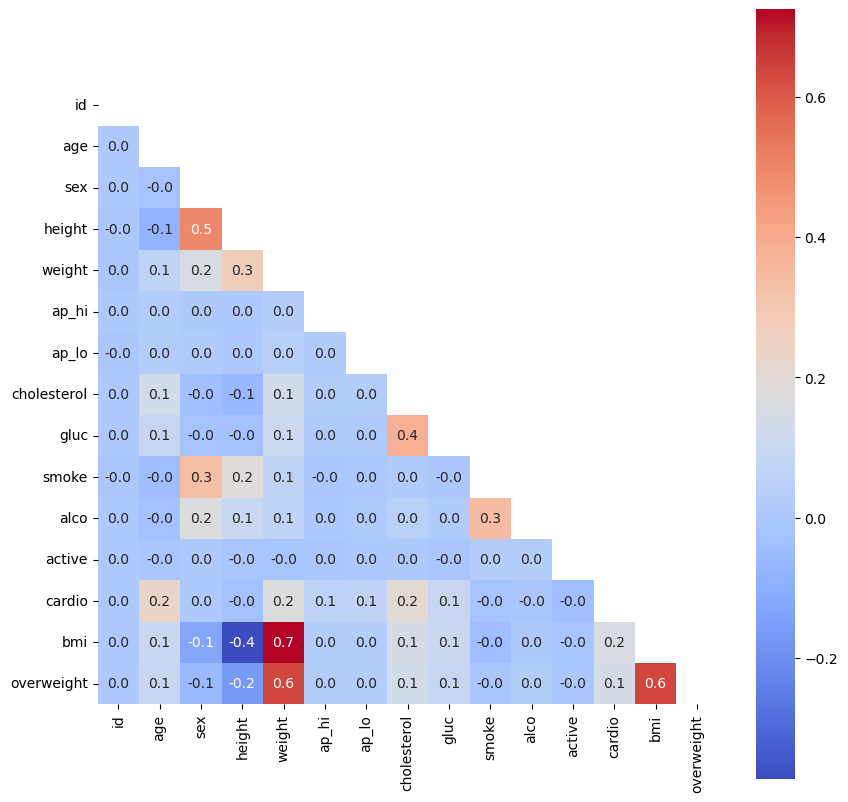

In [78]:
plt.figure(figsize=(10, 10))

sns.heatmap(corr, annot=True, fmt=".1f", mask=mask, cmap="coolwarm", cbar=True, square=True)

plt.show()